# Mushroom Classification: Model Building

To solve the mushroom classification problem, various algorithms like Logistic Regression, k-Nearest Neighbors (kNN), Support Vector Machines (SVM), Gaussian Naive Bayes (GNB), Artificial Neural Networks (ANN), and Decision Trees are employed.

Logistic Regression models the probability of the outcome based on predictor variables, making it suitable for binary classification tasks.

k-Nearest Neighbors classifies data points based on the majority class of their nearest neighbors, making it intuitive but potentially computationally expensive.

SVM finds the hyperplane that best separates classes by maximizing the margin, performing well in high-dimensional spaces.

Gaussian Naive Bayes assumes independence between features and calculates probabilities based on Bayes' theorem.

Artificial Neural Networks consist of interconnected nodes that mimic the human brain's structure, allowing for complex pattern recognition but requiring extensive computational resources.

Decision Trees recursively partition the feature space into regions, making decisions based on feature values, and are interpretable but prone to overfitting.

Each algorithm has its strengths and weaknesses, making the choice dependent on the specific characteristics of the data and the problem at hand. The model giving maximum accuracy will be used for the website

## Importing Libraries and Cleaned Data

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import StackingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X_train = pd.read_csv('/content/drive/MyDrive/MushroomClassification/data/cleanedData/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/MushroomClassification/data/cleanedData/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/MushroomClassification/data/cleanedData/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/MushroomClassification/data/cleanedData/y_test.csv')

In [4]:
X_train.head()

,Unnamed: 0,bruises,odor,ring-number,ring-type,spore-print-color,population,habitat,cap,gill,stalk
0,5921,1,2,1,4,1,4,5,-1.493303,-0.026433,-0.319872
1,1073,1,5,1,4,2,5,0,-1.758621,0.732201,-1.090757
2,3710,0,2,1,2,1,4,0,-1.758621,0.732201,3.228769
3,144,1,0,1,4,2,2,1,0.468500,0.163226,-1.020548
4,5469,0,8,1,0,7,4,0,-0.402521,-2.042127,0.229033


In [5]:
X_train = X_train.drop('Unnamed: 0', axis = True)
X_test = X_test.drop('Unnamed: 0', axis = True)

In [6]:
y_train.head()

,Unnamed: 0,class
0,5921,1
1,1073,0
2,3710,1
3,144,0
4,5469,1


In [7]:
y_train = y_train.drop('Unnamed: 0', axis = True)
y_test = y_test.drop('Unnamed: 0', axis = True)

In [8]:
X_train.head()

,bruises,odor,ring-number,ring-type,spore-print-color,population,habitat,cap,gill,stalk
0,1,2,1,4,1,4,5,-1.493303,-0.026433,-0.319872
1,1,5,1,4,2,5,0,-1.758621,0.732201,-1.090757
2,0,2,1,2,1,4,0,-1.758621,0.732201,3.228769
3,1,0,1,4,2,2,1,0.468500,0.163226,-1.020548
4,0,8,1,0,7,4,0,-0.402521,-2.042127,0.229033


In [9]:
y_train.head()

,class
0,1
1,0
2,1
3,0
4,1


## Logistic Regression

In [10]:
logistic_regression_model = LogisticRegression()

In [11]:
logistic_regression_model.fit(X_train, y_train.values.reshape(-1))

LogisticRegression()

In [12]:
y_pred = logistic_regression_model.predict(X_test)
y_probs = logistic_regression_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC and precision-recall curves

In [13]:
accuracy = accuracy_score(y_test.values.reshape(-1), y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9073010664479081


In [14]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1257
           1       0.93      0.88      0.90      1181

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.91      2438
weighted avg       0.91      0.91      0.91      2438



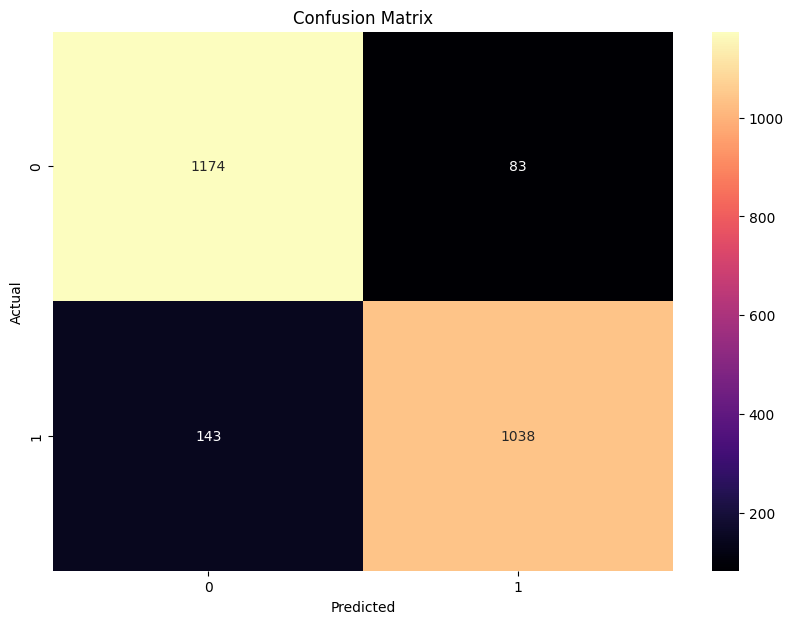

In [15]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

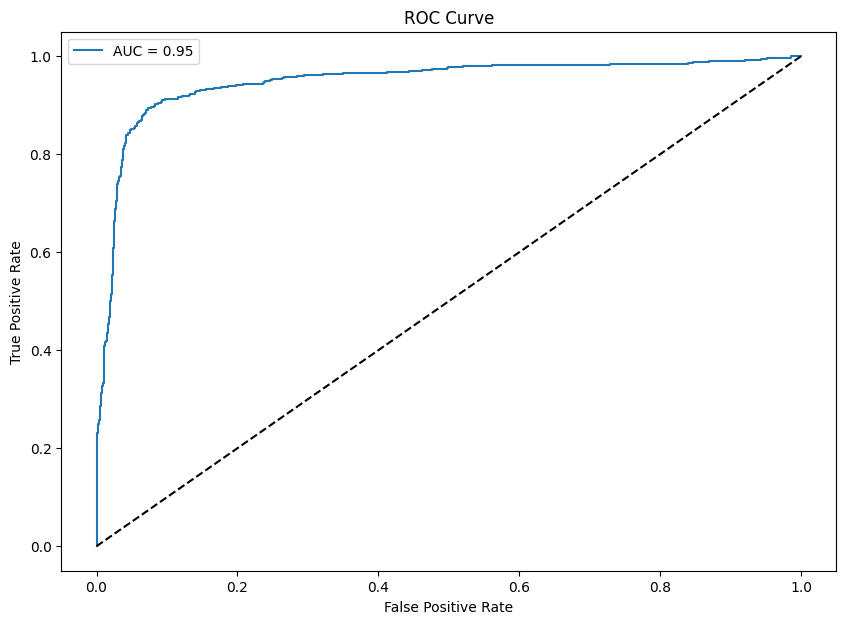

In [16]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.values.reshape(-1), y_probs)
auc = roc_auc_score(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

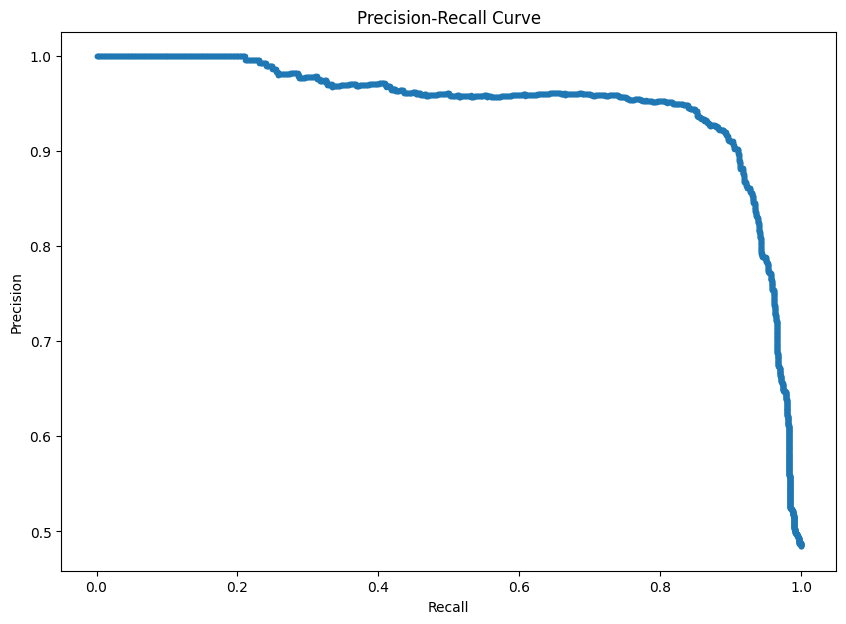

In [17]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [18]:
joblib.dump(logistic_regression_model, '/content/drive/MyDrive/MushroomClassification/models/logistic_regression_model.pkl')

['/content/drive/MyDrive/MushroomClassification/models/logistic_regression_model.pkl']

## K Nearest Neighbour

In [19]:
k = np.sqrt(len(X_train)).astype(int)
k

75

In [20]:
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [21]:
knn_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=75)

In [22]:
y_pred = knn_classifier.predict(X_test)
y_probs = knn_classifier.predict_proba(X_test)[:, 1]

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9881050041017228


In [24]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1257
           1       0.99      0.99      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



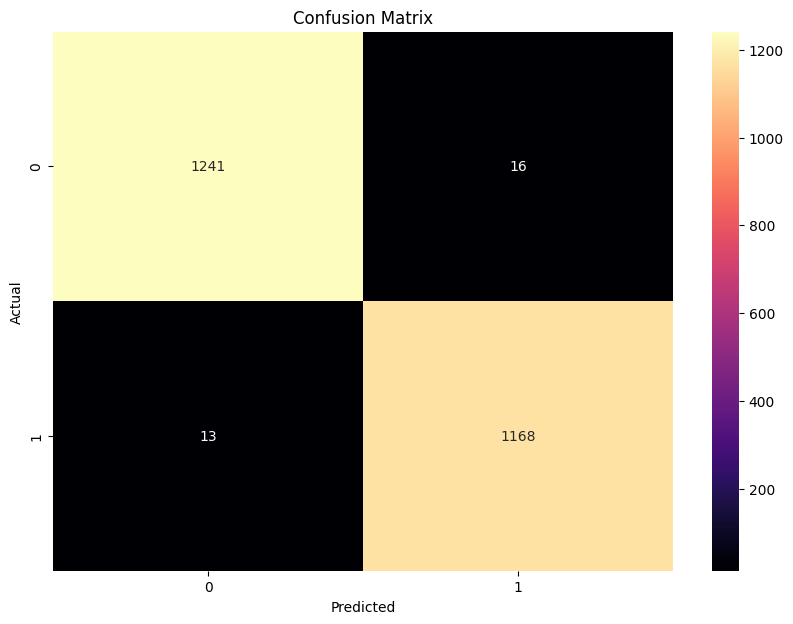

In [25]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

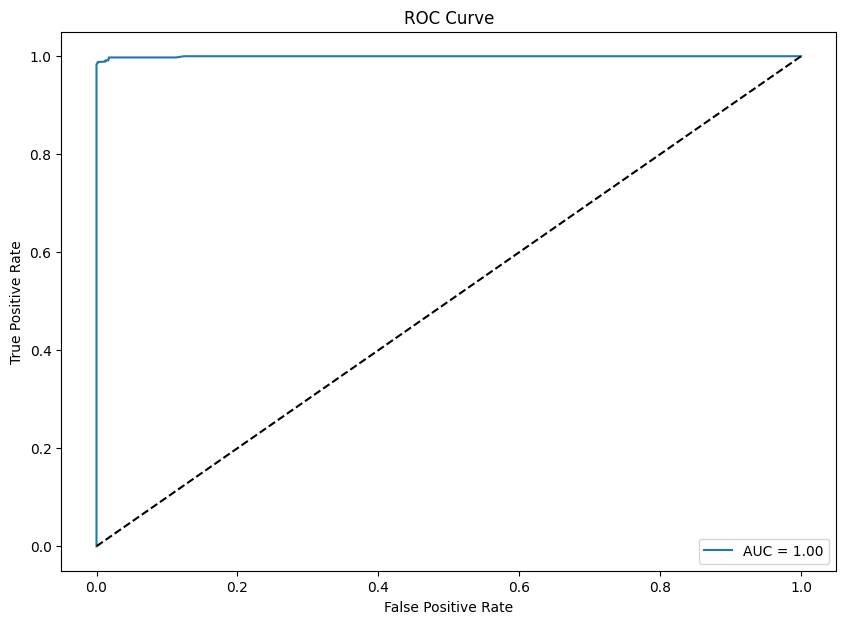

In [26]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.values.reshape(-1), y_probs)
auc = roc_auc_score(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

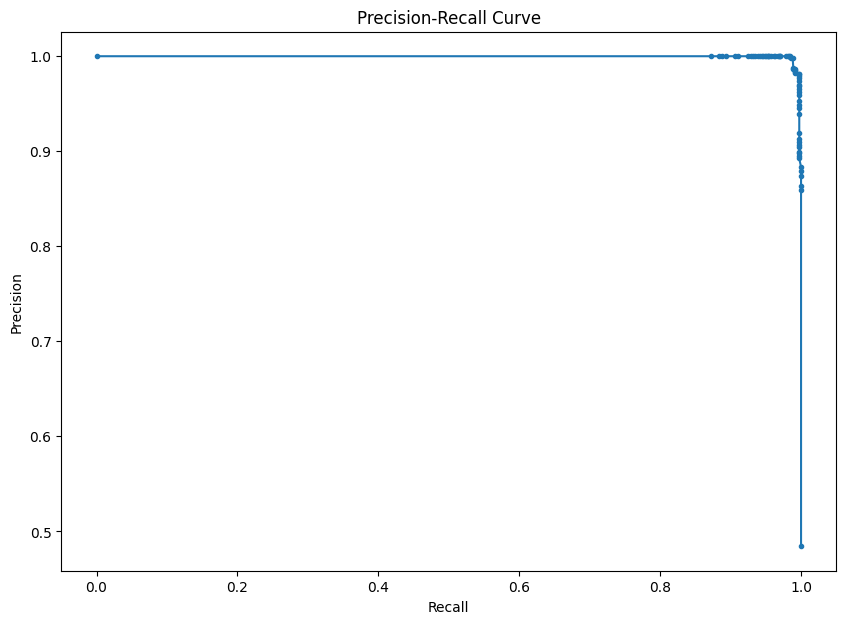

In [27]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
joblib.dump(knn_classifier, '/content/drive/MyDrive/MushroomClassification/models/knn_classifier.pkl')

['/content/drive/MyDrive/MushroomClassification/models/knn_classifier.pkl']

## Naive Bayes

In [28]:
gnb_classifier = GaussianNB()

In [29]:
gnb_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [30]:
y_pred = gnb_classifier.predict(X_test)
y_probs = gnb_classifier.predict_proba(X_test)[:, 1]

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8851517637407711


In [32]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1257
           1       0.91      0.84      0.88      1181

    accuracy                           0.89      2438
   macro avg       0.89      0.88      0.88      2438
weighted avg       0.89      0.89      0.88      2438



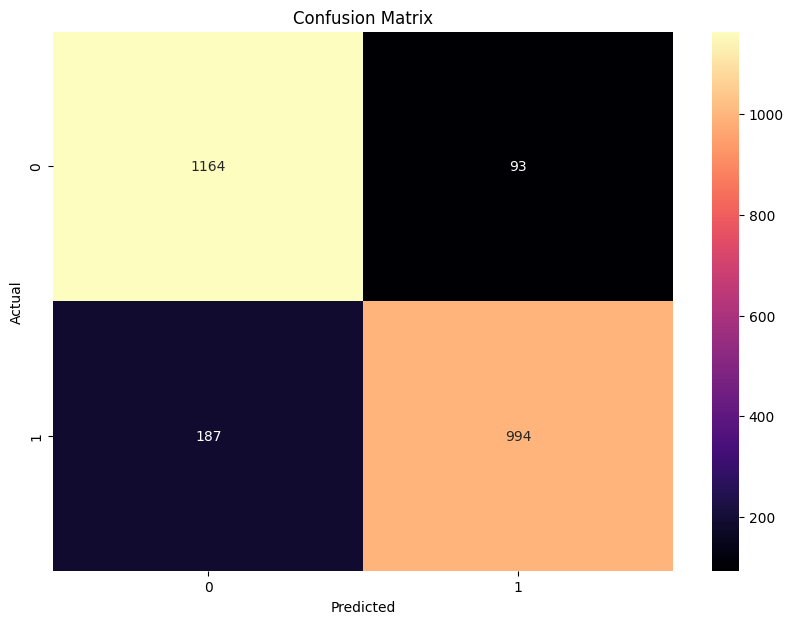

In [33]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

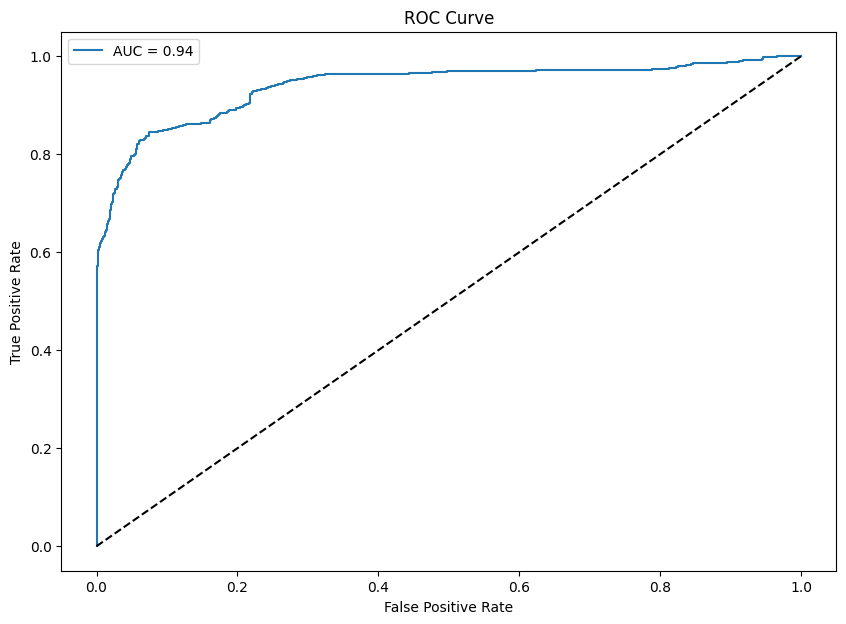

In [34]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.values.reshape(-1), y_probs)
auc = roc_auc_score(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

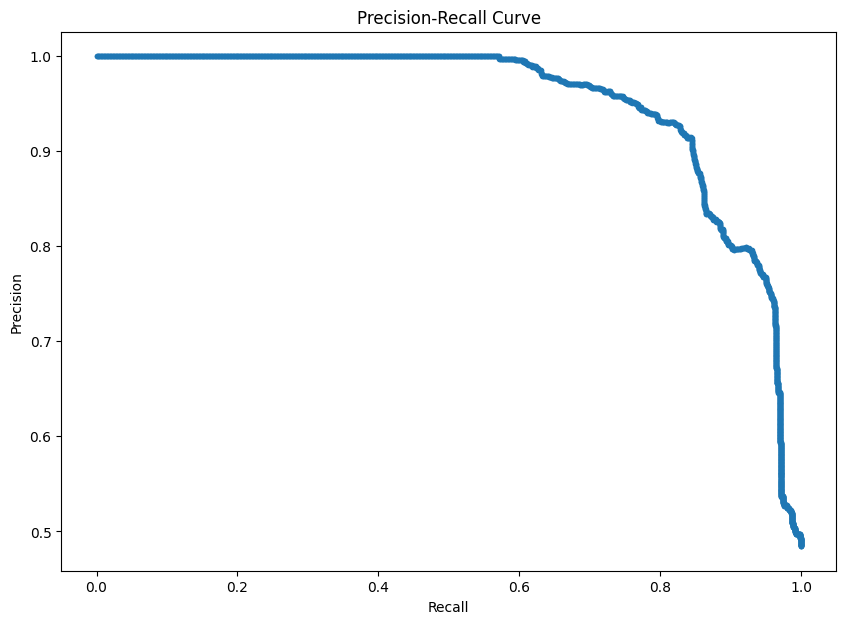

In [35]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
joblib.dump(gnb_classifier, '/content/drive/MyDrive/MushroomClassification/models/gnb_classifier.pkl')

['/content/drive/MyDrive/MushroomClassification/models/gnb_classifier.pkl']

## Support Vector Machine

In [36]:
svm_model = SVC(kernel='rbf', probability=True)

In [37]:
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [38]:
y_pred = svm_model.predict(X_test)
y_probs = svm_model.predict_proba(X_test)[:, 1]

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9938474159146842


In [40]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1257
           1       1.00      0.99      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



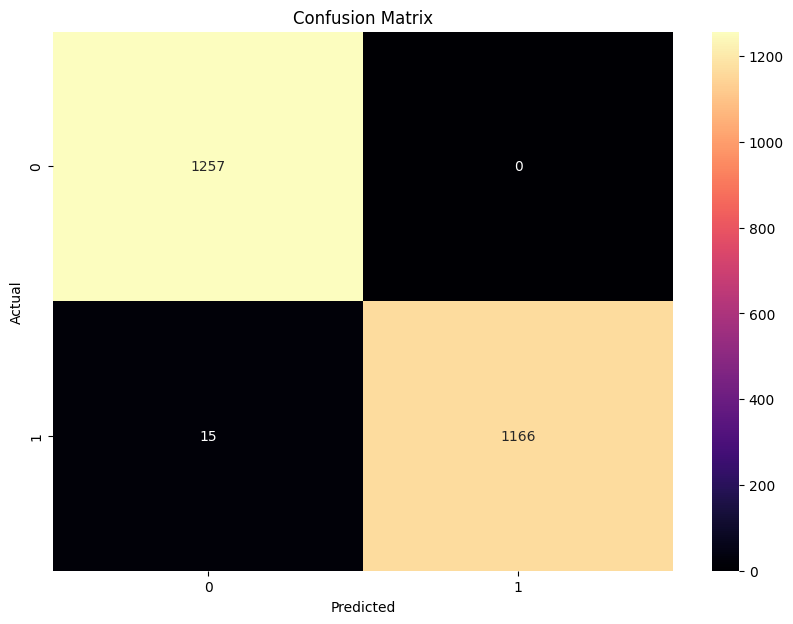

In [41]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

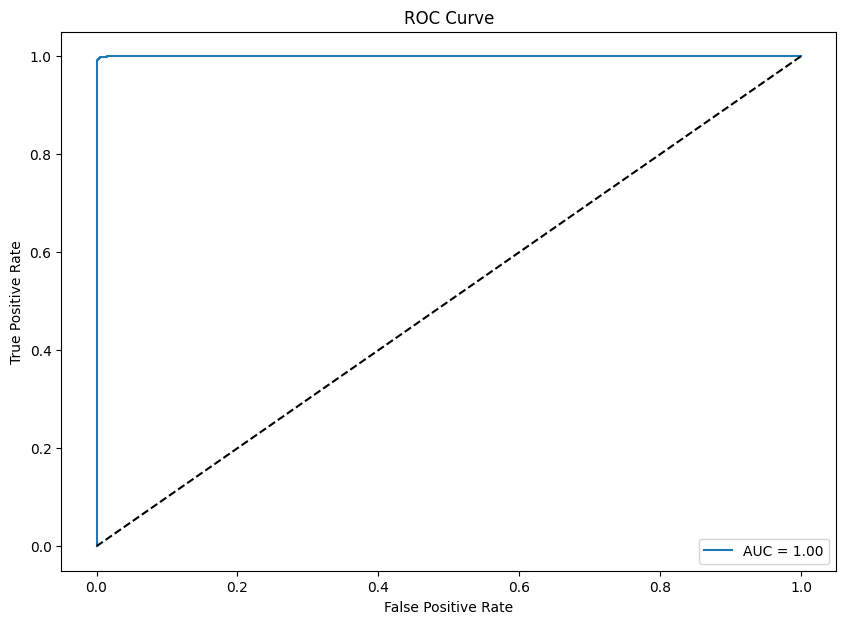

In [42]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.values.reshape(-1), y_probs)
auc = roc_auc_score(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

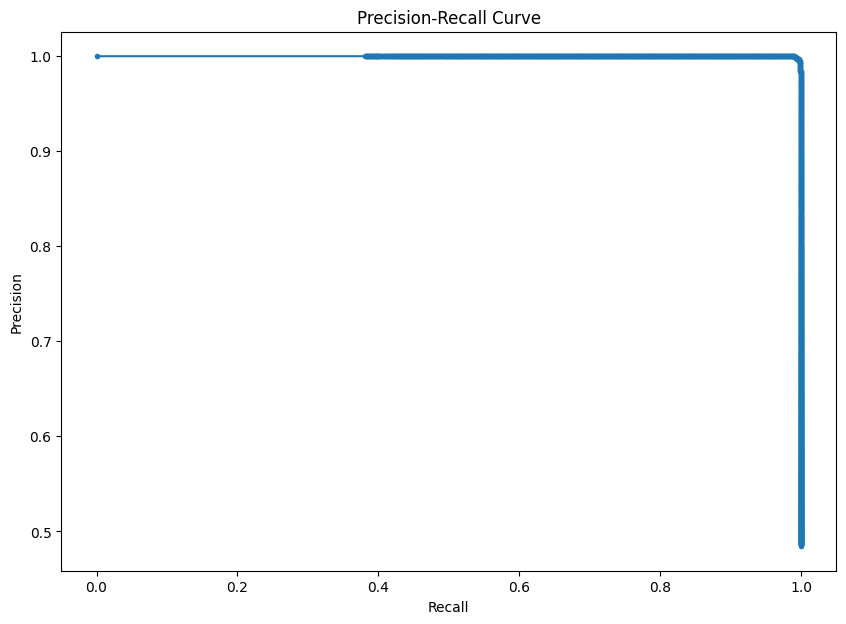

In [43]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [44]:
joblib.dump(svm_model, '/content/drive/MyDrive/MushroomClassification/models/svm_model.pkl')

['/content/drive/MyDrive/MushroomClassification/models/svm_model.pkl']

## Decision Tree

In [47]:
decision_tree_model = DecisionTreeClassifier(max_depth=6, random_state=42)

In [48]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

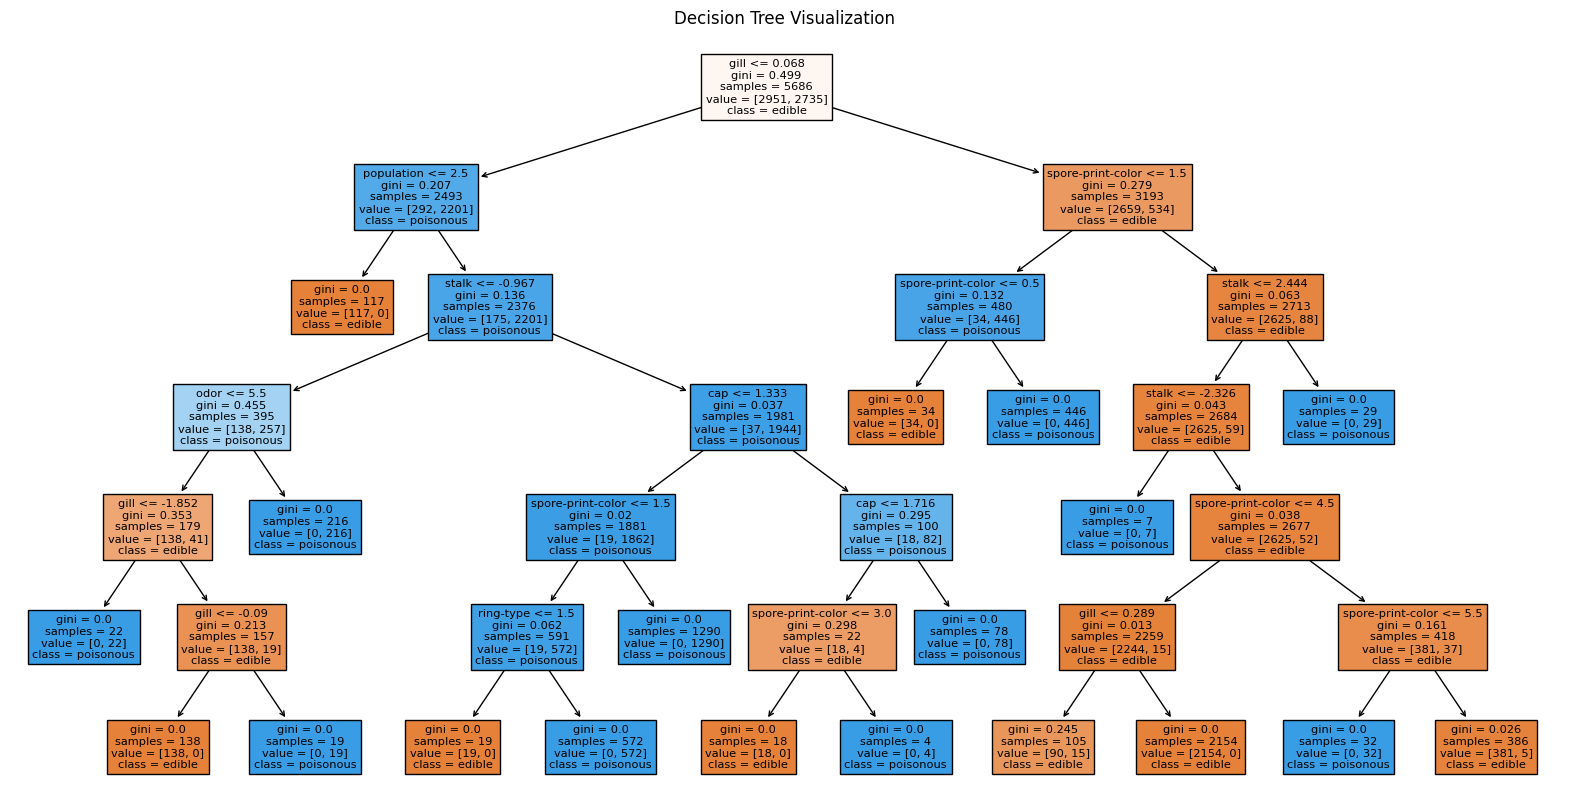

In [49]:
# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(decision_tree_model, filled=True, feature_names=X_train.columns, class_names=['edible', 'poisonous'])
plt.title('Decision Tree Visualization')
plt.show()

In [50]:
y_pred = decision_tree_model.predict(X_test)
y_probs = decision_tree_model.predict_proba(X_test)[:, 1]

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [52]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1257
           1       1.00      0.99      0.99      1181

    accuracy                           1.00      2438
   macro avg       1.00      0.99      1.00      2438
weighted avg       1.00      1.00      1.00      2438



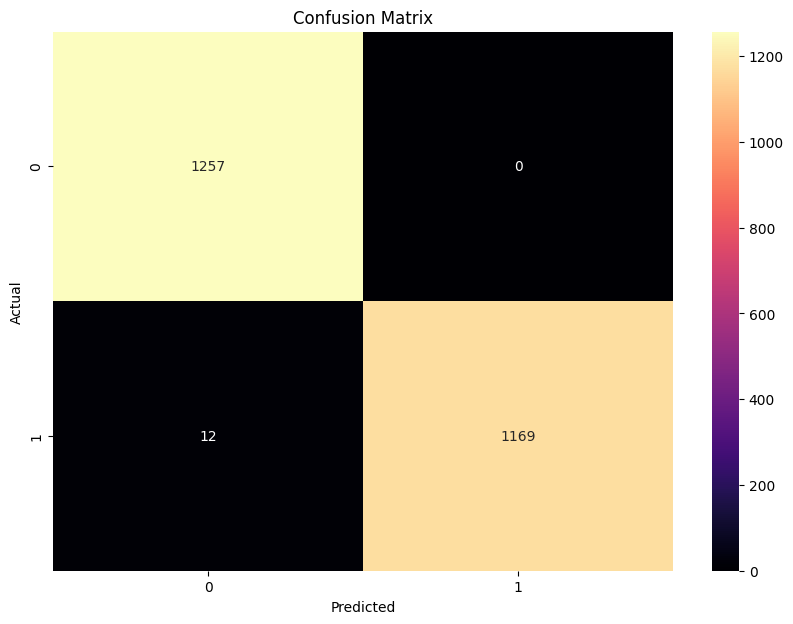

In [53]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

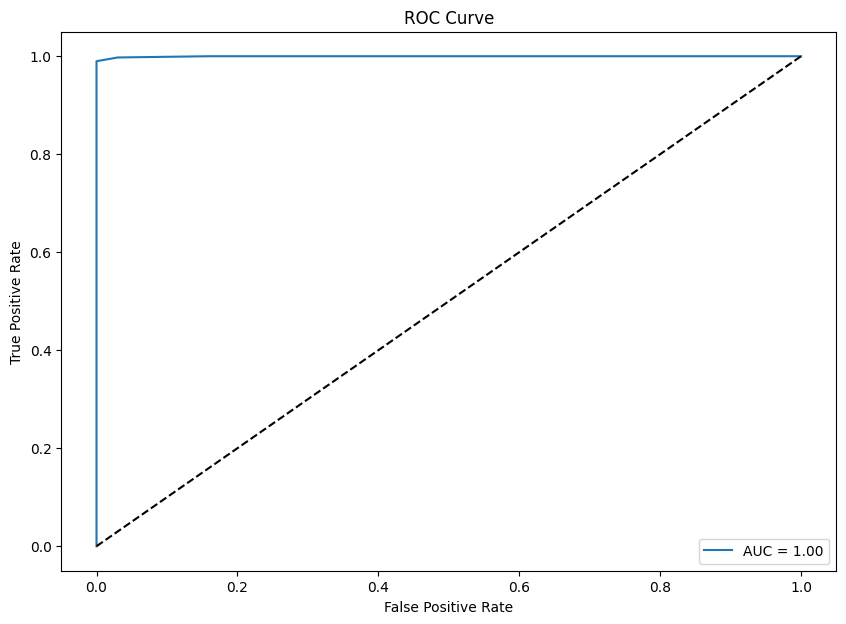

In [54]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.values.reshape(-1), y_probs)
auc = roc_auc_score(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

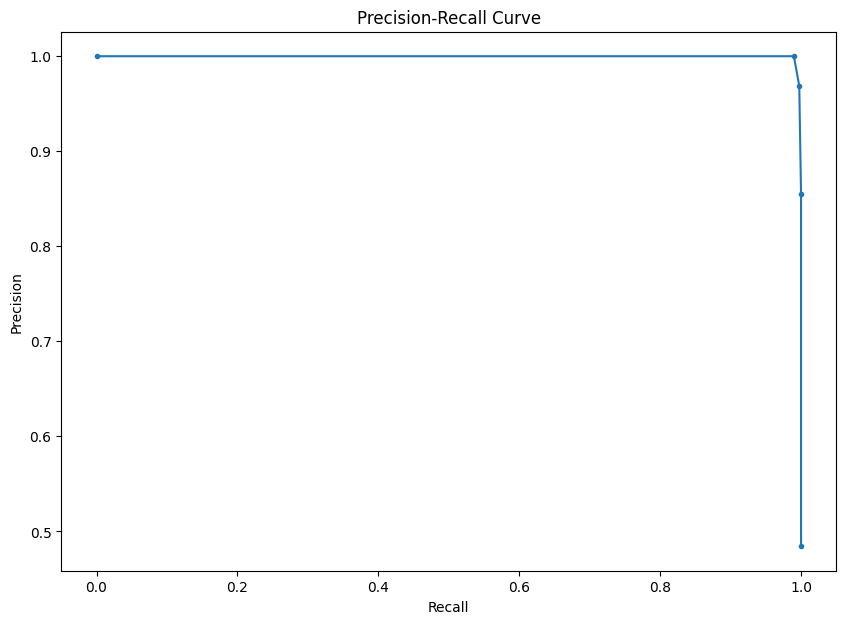

In [55]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [56]:
joblib.dump(decision_tree_model, '/content/drive/MyDrive/MushroomClassification/models/decision_tree_model.pkl')

['/content/drive/MyDrive/MushroomClassification/models/decision_tree_model.pkl']

## Artificial Neural Network

In [57]:
ann_model = Sequential([
    Dense(256, input_dim = 10, activation = 'relu', kernel_regularizer = l1(0.01)),
    Dropout(0.5),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [58]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 68865 (269.00 KB)
Trainable params: 68865 (269.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
ann_model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [60]:
history = ann_model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 100
)

Epoch 1/100
143/143 [==============================] - 2s 6ms/step - loss: 1.3695 - accuracy: 0.8725 - val_loss: 0.6677 - val_accuracy: 0.9095
Epoch 2/100
143/143 [==============================] - 1s 4ms/step - loss: 0.5107 - accuracy: 0.9261 - val_loss: 0.3465 - val_accuracy: 0.9552
Epoch 3/100
143/143 [==============================] - 1s 4ms/step - loss: 0.3339 - accuracy: 0.9433 - val_loss: 0.2410 - val_accuracy: 0.9684
Epoch 4/100
143/143 [==============================] - 1s 4ms/step - loss: 0.2755 - accuracy: 0.9505 - val_loss: 0.2093 - val_accuracy: 0.9780
Epoch 5/100
143/143 [==============================] - 1s 7ms/step - loss: 0.2336 - accuracy: 0.9547 - val_loss: 0.1848 - val_accuracy: 0.9798
Epoch 6/100
143/143 [==============================] - 1s 5ms/step - loss: 0.2260 - accuracy: 0.9551 - val_loss: 0.1735 - val_accuracy: 0.9789
Epoch 7/100
143/143 [==============================] - 1s 4ms/step - loss: 0.2074 - accuracy: 0.9543 - val_loss: 0.1514 - val_accuracy: 0.9807

Text(0, 0.5, 'Accuracy')

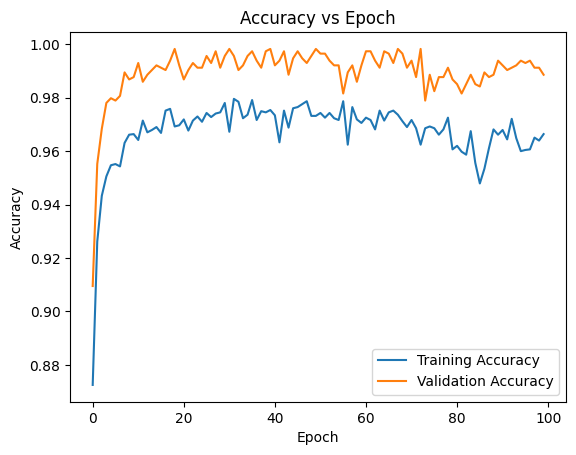

In [61]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

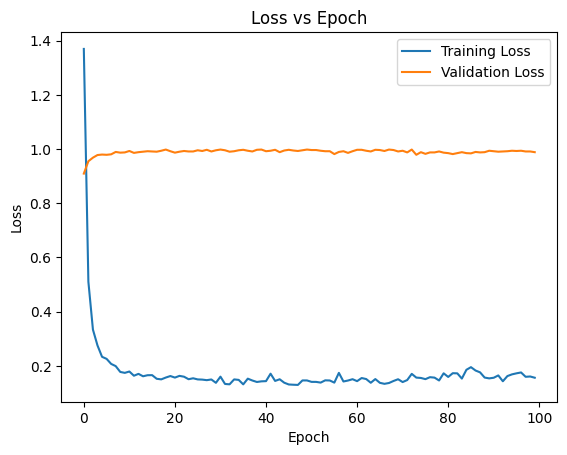

In [62]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_accuracy'], label = 'Validation Loss')
plt.legend()
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [63]:
y_pred = ann_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) # Set threshold of 0.5
y_pred

77/77 [==============================] - 1s 5ms/step


array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [64]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1257
           1       0.99      0.97      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



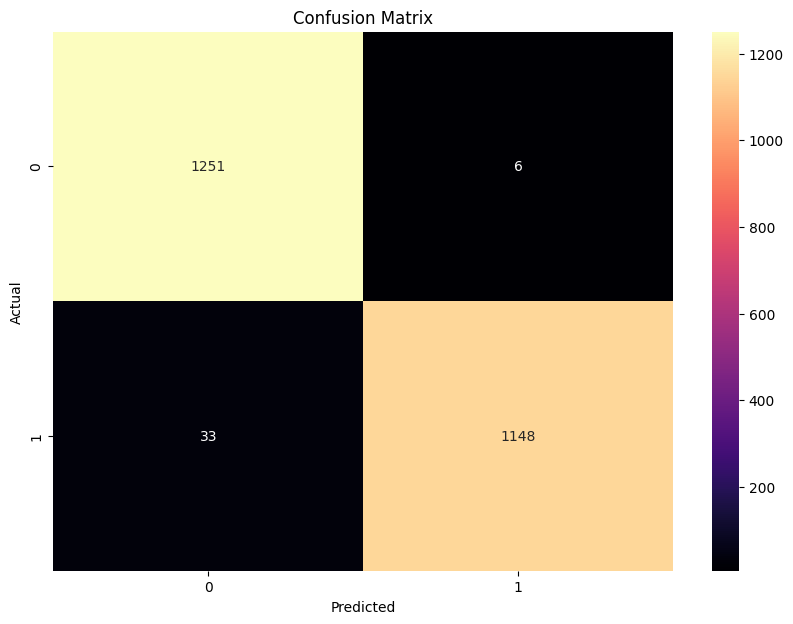

In [65]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
ann_model.save('/content/drive/MyDrive/MushroomClassification/models/ann_model.keras')

## Ensemble

In [75]:
estimators = [
    ('logistic_regression', logistic_regression_model),
    ('knn', knn_classifier),
    ('nb', gnb_classifier),
    ('svm', svm_model),
    ('decision_tree', decision_tree_model)
    # ('ann', ann_model)
]

In [76]:
stacking_model = StackingClassifier(estimators=estimators, final_estimator=svm_model)

In [77]:
stacking_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('logistic_regression', LogisticRegression()),
                               ('knn', KNeighborsClassifier(n_neighbors=75)),
                               ('nb', GaussianNB()),
                               ('svm', SVC(probability=True)),
                               ('decision_tree',
                                DecisionTreeClassifier(max_depth=6,
                                                       random_state=42))],
                   final_estimator=SVC(probability=True))

In [78]:
y_pred = stacking_model.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy}")

Stacking Model Accuracy: 0.9987694831829368


In [80]:
joblib.dump(stacking_model, '/content/drive/MyDrive/MushroomClassification/models/stacking_model.pkl')

['/content/drive/MyDrive/MushroomClassification/models/stacking_model.pkl']

## Comparitive Analysis

In [81]:
model_names = ["Logistic Regression", "kNN", "Naive Bayes", "SVM", "Decision Tree", "ANN", "Ensemble Model"]
accuracies = [0.907, 0.988, 0.885, 0.993, 1, 0.990, 0.998]

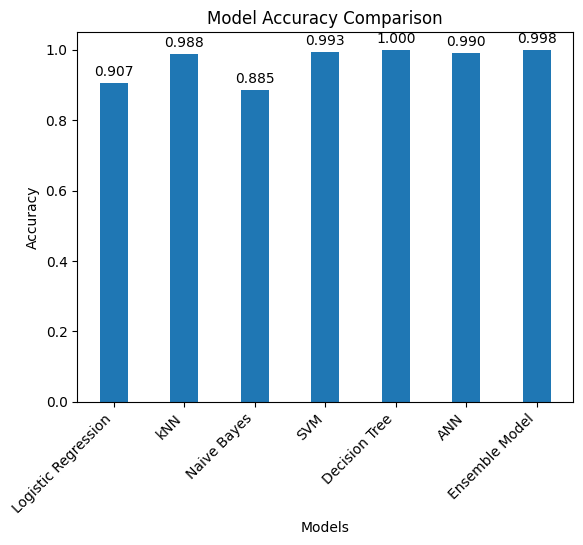

In [85]:
fig, ax = plt.subplots()
bars = ax.bar(model_names, accuracies, width=0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.yticks()

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')
plt.show()

## Ensemble Model for Mushroom Classification

The ensemble model combines the strengths of various classifiers to improve prediction accuracy and reliability for mushroom classification. It includes:

- **Logistic Regression**
- **K-Nearest Neighbors (KNN)**
- **Naive Bayes**
- **Support Vector Machine (SVM)**
- **Decision Tree**
- **Artificial Neural Network (ANN)** as the final estimator.

**Advantages:**
- **Improved Accuracy**: Combining multiple models often yields better results than using individual models.
- **Robustness**: Reduces overfitting and handles dataset variations better.
- **Generalization**: Performs well on new, unseen data due to model diversity.

**Web Integration:**
- Users input mushroom characteristics via a web interface.
- The ensemble model predicts if the mushroom is edible or poisonous, leveraging the combined strengths of all models for accurate classification.